In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint as pp

### Explore taxonomy:

In [2]:
taxonomy = {}
with open('../resources/taxonomy.json') as f:
    taxonomy = json.load(f)

for cat in taxonomy["taxonomy"]:
    if cat['name-category'] == 'Physics':
        print(cat['name-category'], ' = ', cat['id-category'], '-> number of sub-categories: %s' % len(cat['macro-categories']))
    else:
        print(cat['name-category'], ' = ', cat['id-category'], '-> number of sub-categories: %s' % len(cat['categories']))

Physics  =  None -> number of sub-categories: 13
Mathematics  =  math -> number of sub-categories: 32
Computer Science  =  cs -> number of sub-categories: 40
Quantitative Biology  =  q-bio -> number of sub-categories: 10
Quantitative Finance  =  q-fin -> number of sub-categories: 9
Statistics  =  stat -> number of sub-categories: 6
Electrical Engineering and Systems Science  =  eess -> number of sub-categories: 4
Economics  =  econ -> number of sub-categories: 3


In [3]:
# 'Physics' is the only one with 'macro-categories'
print("In 'Physics':\n")
for cat in taxonomy["taxonomy"][0]['macro-categories']:
    print(cat['name-category'], ' = ', cat['id-category'], '-> number of sub-categories: %s' % len(cat['categories']))

In 'Physics':

Astrophysics  =  astro-ph -> number of sub-categories: 6
Condensed Matter  =  cond-mat -> number of sub-categories: 9
General Relativity and Quantum Cosmology  =  gr-qc -> number of sub-categories: 0
High Energy Physics - Experiment  =  hep-ex -> number of sub-categories: 0
High Energy Physics - Lattice  =  hep-lat -> number of sub-categories: 0
High Energy Physics - Phenomenology  =  hep-ph -> number of sub-categories: 0
High Energy Physics - Theory  =  hep-th -> number of sub-categories: 0
Mathematical Physics  =  math-ph -> number of sub-categories: 0
Nonlinear Sciences  =  nlin -> number of sub-categories: 5
Nuclear Experiment  =  nucl-ex -> number of sub-categories: 0
Nuclear Theory  =  nucl-th -> number of sub-categories: 0
Physics  =  physics -> number of sub-categories: 22
Quantum Physics  =  quant-ph -> number of sub-categories: 0


### Explore relations between papers and subjects:

In [4]:
dataset_path = "../resources/papers-subjects-dataset.pkl"
df = pd.read_pickle(dataset_path)
df

,paper_id,primary-subject,astro-ph,astro-ph.CO,astro-ph.EP,astro-ph.GA,astro-ph.HE,astro-ph.IM,astro-ph.SR,cond-mat,...,q-fin.PM,q-fin.RM,q-fin.ST,q-fin.TR,quant-ph,stat.AP,stat.CO,stat.ME,stat.ML,stat.OT
0,41513,cs.CV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41587,stat.ML,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,61821,cs.LG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,61822,cs.LG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,61823,cs.LG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37363,101219,cs.LG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
37364,101220,cs.LG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
37365,101221,cs.CV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
37366,101222,cs.LG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
subjects = list(df.columns)[2:]
subjects_counts = []
for s in subjects:
    subjects_counts.append((s,df[s].sum()))

df_stats = pd.DataFrame(subjects_counts, columns=['subject', 'number_of_papers'])
df_stats

,subject,number_of_papers
0,astro-ph,6
1,astro-ph.CO,7
2,astro-ph.EP,3
3,astro-ph.GA,9
4,astro-ph.HE,1
...,...,...
128,stat.AP,299
129,stat.CO,208
130,stat.ME,309
131,stat.ML,15516


Text(0.5, 0, 'subject')

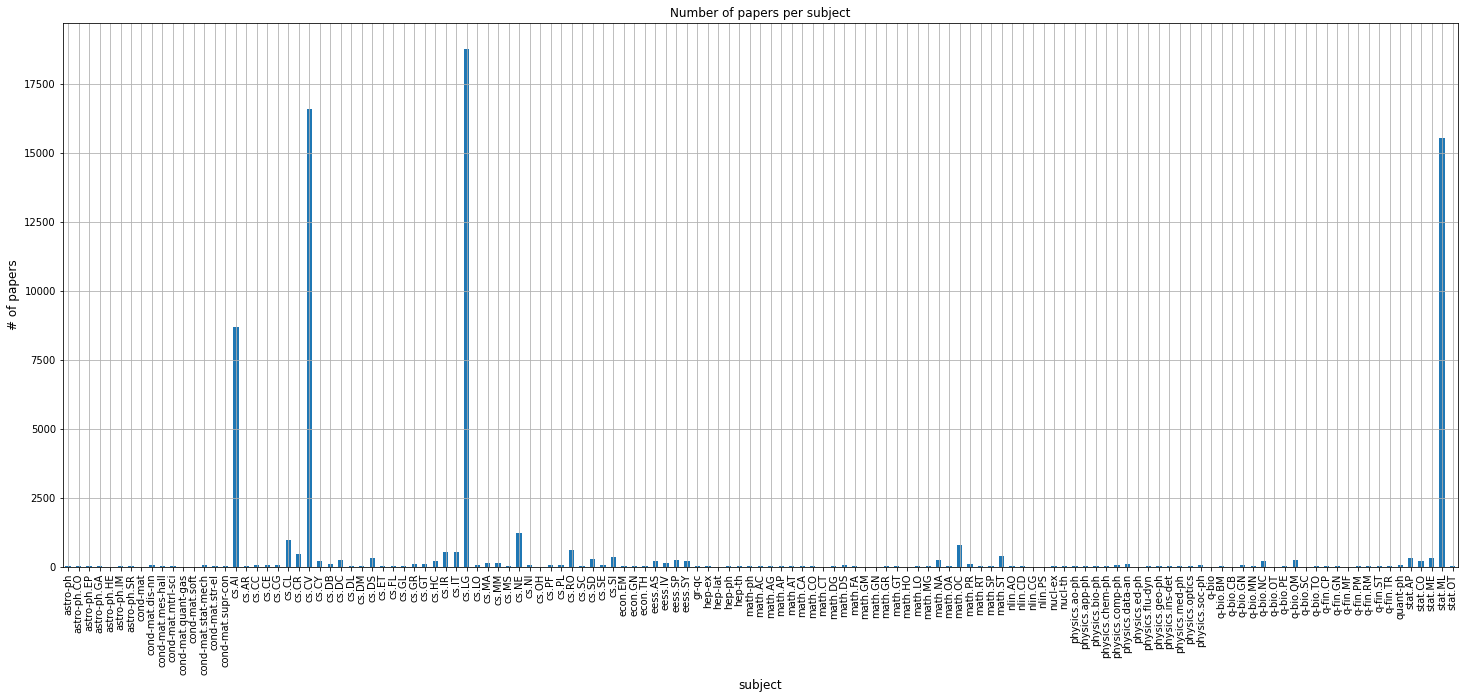

In [6]:
df_stats.plot(x='subject', y='number_of_papers', kind='bar', legend=False, grid=True, figsize=(25, 10))
plt.title("Number of papers per subject")
plt.ylabel('# of papers', fontsize=12)
plt.xlabel('subject', fontsize=12)

In [7]:
# check if each paper has at least a 'cs' subject or 'stat.ML'

def get_primary_subject_by_paper_id(paper_id):
    paper_row = df.loc[df.paper_id == paper_id]
    return paper_row['primary-subject'].to_numpy()[0]

def get_all_subjects_by_paper_id(paper_id):
    paper_row = df.loc[df.paper_id == paper_id].squeeze()
    return paper_row.index[paper_row == 1].to_list()

c = 0
c_n = 0
for i,r in df.iterrows():
    subs = get_all_subjects_by_paper_id(r['paper_id'])
    t = False
    for s in subs:
        if s.startswith('cs.') or s == 'stat.ML': #s == 'cs.CV' or s == 'cs.LG' or s == 'cs.AI' or s == 'cs.CL' or s == 'stat.ML'
            t = True
            break
    if t is True:
        c += 1
    else:
        c_n += 1
        print(r['paper_id'], ':', subs)

print( c, '-', c_n)

37368 - 0


### Create a simplified taxonomy:

In [8]:
simplified_taxonomy = {}

for cat in taxonomy["taxonomy"]:
    if cat['name-category'] == 'Physics':
        for macro_cat  in cat['macro-categories']:
            simplified_taxonomy[macro_cat['id-category']] = {
                'name-category': macro_cat['name-category'],
                'id-category': macro_cat['id-category'],
                'ids': [c['id-category'] for c in macro_cat['categories']]
            }
    elif cat['name-category'] == 'Computer Science':
        for sub_cat in cat['categories']:
            simplified_taxonomy[sub_cat['id-category']] = {'name-category': sub_cat['name-category'], 'id-category': sub_cat['id-category'], 'ids': []}
    elif cat['name-category'] == 'Statistics':
        simplified_taxonomy['stat.ML'] = {'name-category': 'Machine Learning', 'id-category': 'stat.ML', 'ids': []}
        simplified_taxonomy['stat'] = {'name-category': 'Statistics',
                                       'id-category': 'stat',
                                       'ids': [ c['id-category'] for c in cat['categories'] if c['id-category']!='stat.ML']
                                      }     
    else:
        simplified_taxonomy[cat['id-category']] = {
            'name-category': cat['name-category'],
            'id-category': cat['id-category'],
            'ids': [ c['id-category'] for c in cat['categories'] ]
        }

#simplified_taxonomy

In [9]:
simplified_taxonomy.pop('hep-ex')
simplified_taxonomy.pop('hep-lat')
simplified_taxonomy.pop('hep-ph')
simplified_taxonomy.pop('hep-th')
simplified_taxonomy['hep'] = {'name-category': 'High Energy Physics', 'id-category': 'hep', 'ids': ['hep-ex','hep-lat','hep-ph','hep-th']}
simplified_taxonomy.pop('nucl-ex')
simplified_taxonomy.pop('nucl-th')
simplified_taxonomy['nucl'] = {'name-category': 'Nuclear', 'id-category': 'nucl', 'ids': ['nucl-ex','nucl-th']}
pp(simplified_taxonomy, indent=4)

{   'astro-ph': {   'id-category': 'astro-ph',
                    'ids': [   'astro-ph.GA',
                               'astro-ph.CO',
                               'astro-ph.EP',
                               'astro-ph.HE',
                               'astro-ph.IM',
                               'astro-ph.SR'],
                    'name-category': 'Astrophysics'},
    'cond-mat': {   'id-category': 'cond-mat',
                    'ids': [   'cond-mat.dis-nn',
                               'cond-mat.mtrl-sci',
                               'cond-mat.mes-hall',
                               'cond-mat.other',
                               'cond-mat.quant-gas',
                               'cond-mat.soft',
                               'cond-mat.stat-mech',
                               'cond-mat.str-el',
                               'cond-mat.supr-con'],
                    'name-category': 'Condensed Matter'},
    'cs.AI': {   'id-category': 'cs.AI',
                

### Create a simplified dataset:

In [10]:
def get_oneHotVector(x):
    # create dict 
    row = {'paper_id': x['paper_id']}
    for k in simplified_taxonomy.keys():
        row[k] = 0
    # update dict
    all_subjects = list(x.index)[2:]
    for s in all_subjects:
        if s in simplified_taxonomy.keys():
            row[s] = x[s]
        else:
            for k in simplified_taxonomy.keys():
                if s.startswith(k) and x[s]==1:
                    row[k] = 1
    # return Series
    return pd.Series(row)


simplified_df = df.apply(lambda x: get_oneHotVector(x), axis=1)
simplified_df

,paper_id,astro-ph,cond-mat,gr-qc,math-ph,nlin,physics,quant-ph,math,cs.AI,...,cs.SC,cs.SY,q-bio,q-fin,stat.ML,stat,eess,econ,hep,nucl
0,41513,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,41587,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,61821,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,61822,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,61823,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37363,101219,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
37364,101220,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
37365,101221,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
37366,101222,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [11]:
subjects = list(simplified_df.columns)[1:]
subjects_counts = []
for s in subjects:
    subjects_counts.append((s,simplified_df[s].sum()))

df_stats = pd.DataFrame(subjects_counts, columns=['subject', 'number_of_papers'])
#df_stats

Text(0.5, 0, 'subject')

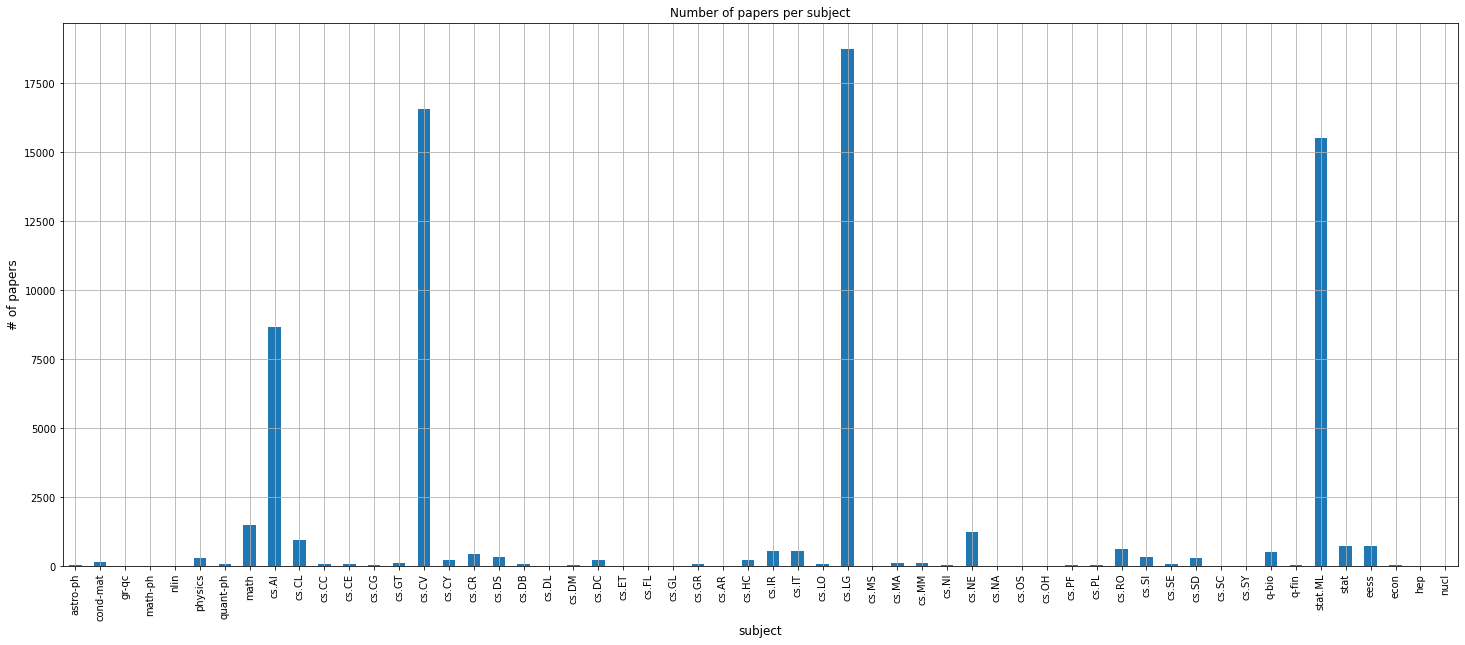

In [12]:
df_stats.plot(x='subject', y='number_of_papers', kind='bar', legend=False, grid=True, figsize=(25, 10))
plt.title("Number of papers per subject")
plt.ylabel('# of papers', fontsize=12)
plt.xlabel('subject', fontsize=12)

### Save taxonomy and dataset:

In [13]:
with open('../resources/taxonomy-56.json', 'w') as f:
    json.dump({'taxonomy': [t for _,t in simplified_taxonomy.items()]}, f)


In [14]:
# save dataset
dataset_path = "../resources/papers-subjects-dataset-56.pkl"
simplified_df.to_pickle(dataset_path, protocol=4)